In [1]:
#student number: 737008
#student name: Siyi Guo
#Created data: 23/3/2017
#COMP20008 project phase1

In [2]:
#library setup
import pandas as pd
import matplotlib.pyplot as plt

# Answer to 1.1

In [3]:
#do this for January
raw_1 = pd.read_csv('raw-january.csv')
duration = pd.to_datetime(raw_1['dropoff_datetime'], format = '%d/%m/%y %H:%M')-pd.to_datetime(raw_1['pickup_datetime'],format = '%d/%m/%y %H:%M') 
#delete a column, axis = 1 means columns and 0 for rows
January = raw_1.drop(['pickup_datetime', 'dropoff_datetime'], axis = 1)

#convert the duration into minutes
January.insert(0, 'duration', pd.Series(duration.astype('timedelta64[m]')))
#change the heading into format Index Duration Trip_distance Passenger_count Payment_amount
January.columns = ["Duration", "Trip_distance", "Passenger_count", "Payment_amount"]
January.columns.name = "Index"

In [4]:
#do a similar thing for June
raw_6 = pd.read_csv('raw-june.csv')
duration = pd.to_datetime(raw_6['dropoff_datetime'], format = '%d/%m/%y %H:%M')-pd.to_datetime(raw_6['pickup_datetime'],format = '%d/%m/%y %H:%M')
#delete a column, axis = 1 means columns and 0 for rows
June = raw_6.drop(['pickup_datetime', 'dropoff_datetime'], axis = 1)

#convert the duration into minutes
June.insert(0, 'duration', pd.Series(duration.astype('timedelta64[m]')))
#change the heading into format Index Duration Trip_distance Passenger_count Payment_amount
June.columns = ["Duration", "Trip_distance", "Passenger_count", "Payment_amount"]
June.columns.name = "Index"

# Answer to 1.2

In [5]:
#in this part wwe find out the mean for January and June's category of Trip distance, trip duration and Passenger

In [6]:
#there are 66 star for the bottome line
#print out mean trip distance for both June and January
Title = 'MeanTripDistance'
star_num = int((66-len(Title))/2) - 1
print ('*' * star_num, Title, '*' * star_num)
print ('January:', January['Trip_distance'].mean())
print ('   June:', June['Trip_distance'].mean())
print ('*' * 66)

************************ MeanTripDistance ************************
January: 2.88293355582
   June: 3.04704755063
******************************************************************


In [7]:
#print out mean trip duration for both June and January
Title = 'MeanTripDuratione'
star_num = int((66-len(Title))/2)
print ('*' * star_num, Title,'*' * (star_num - 1))
print ('January:', January['Duration'].mean())
print ('   June:', June['Duration'].mean())
print ('*' * 66)

************************ MeanTripDuratione ***********************
January: 14.9579532223
   June: 17.0016882942
******************************************************************


In [8]:
#print out mean trip passenger for both June and January
Title = 'MeanTripPassenger'
star_num = int((66-len(Title))/2) - 1
print ('*' * star_num, Title, '*' * (star_num + 1))
print ('January:', January['Passenger_count'].mean())
print ('   June:', June['Passenger_count'].mean())
print ('*' * 66)

*********************** MeanTripPassenger ************************
January: 1.66855843549
   June: 1.65837187374
******************************************************************


# Answer to 1.3

In [9]:
#in this part we use boxplot to compare June's data and January's for category of 
#Duration Trip_distance and Payment_amount
#each category has one boxplot

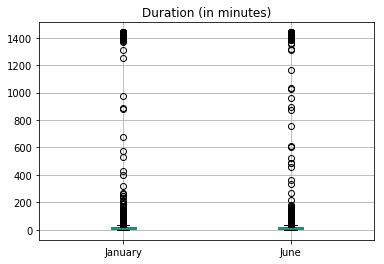

In [10]:
#Duration
#merge 2 data series into one dataframe
result = pd.concat([January['Duration'], June['Duration']], axis=1, join='inner')
#change the heading
result.columns = ['January', 'June']
#show the graph
result.boxplot()
plt.title("Duration (in minutes)")
plt.show()

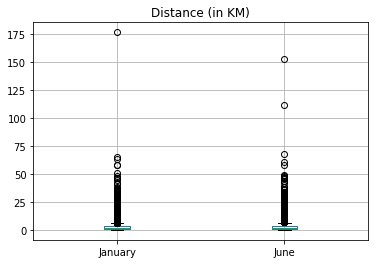

In [11]:
#Distance
#merge 2 data series into one data frame
result = pd.concat([January['Trip_distance'], June['Trip_distance']], axis=1, join='inner')
#change the heading
result.columns = ['January', 'June']
#plot and show the graph
result.boxplot()
plt.title("Distance (in KM)")
plt.show()

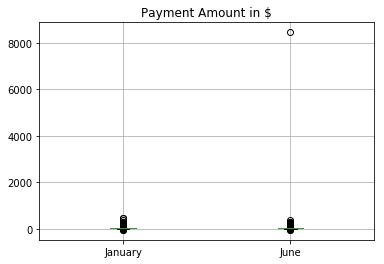

In [12]:
#Trip Fare
#merge the data column into one data frame
result = pd.concat([January['Payment_amount'], June['Payment_amount']], axis=1, join='inner')
#change the heading
result.columns = ['January', 'June']
#show the graph
result.boxplot()
plt.title("Payment Amount in $")
plt.show()

# Answer to 1.4

In [13]:
#in this part we do two thins:
#1 find out the noise data ratio
#2 replace this data with the mean of that category

In [13]:
#Answer to 1.4.1
#since most data in this data set is 1 to 4 people, we focues
#our research on the normal 5-seat car
RPassenger = [1,4]
#since maxium is 30 kilometer, the duration should be less than 40 minutes given the speed of taxi is 60km/hour
#and some traffic jam time
#and not many people take taxi if only for 4 minutes' drive
RDuration = [5,40]
#normal's range for a taxi is 0 to 30 kilometer, this is also the distance from airport to the CBD
#beyong this range, most people just drive by themselves
#or the rare case which someone insisit for taxi, we can regard this abnormal as noise data
#1 km trip distance is equal to 10 minutes walk, pointless to take taxi
RTrip_dist = [1,30]
#Under this normal range, the price for per kilometer is 3.333dolar. Taxi that beyond this price is not
#consider as the normal taxi, even taken the traffic jam factor into account
#so this should be a normal range
#where 2.5 dollar is the staring fee for taxi
RPayment_amount = [2.5,100]

In [14]:
#Answer to 1.4.2
#in this part we found out the noise ratio in the data set given normal range we have set up in 1.4.1
def noise_ratio(dataframe, title, Rnormal):
    min_valid = Rnormal[0]
    max_valid = Rnormal[1]
    dataset = dataframe[title]
    
    #find out the total number of data in this dataframe
    #dataframe.shape return a tuple in the form (number of rows, number of columns)
    #take shaoe[0] so that we know how many data are there
    Total_num = dataset.shape[0]
    #find out the noise data series that is smalled then minimum valie or bigger than maximum valid
    #then thake the shape of this serise
    noise_num = dataset.loc[(dataset < min_valid) | (dataset > max_valid)].shape[0]
    
    percentage = noise_num / Total_num *100
        
    print('*' * 83)
    print("{}% of instances in {} are noisy! (normal range is between {} and {})".format(round(percentage, 2), title, min_valid, max_valid))
    print('*' * 83)

noise_ratio(January, "Duration", RDuration)
noise_ratio(January, "Trip_distance", RTrip_dist)
noise_ratio(January, "Passenger_count", RPassenger)
noise_ratio(January, "Payment_amount", RPayment_amount)

***********************************************************************************
16.09% of instances in Duration are noisy! (normal range is between 5 and 40)
***********************************************************************************
***********************************************************************************
24.57% of instances in Trip_distance are noisy! (normal range is between 1 and 30)
***********************************************************************************
***********************************************************************************
8.84% of instances in Passenger_count are noisy! (normal range is between 1 and 4)
***********************************************************************************
***********************************************************************************
0.22% of instances in Payment_amount are noisy! (normal range is between 2.5 and 100)
**********************************************************************************

In [15]:
#Answer to 1.4.3    
#in this part we replace all noise data with the mean value of valid data under that category
#note this part will done irrevisible change to the January data set
#which mean this can only run once, for the second time running please read row_january dataset again.
def replace_mean(dataframe, title, Rnormal):
    min_valid = Rnormal[0]
    max_valid = Rnormal[1]
    
    #locate valid data
    valid_data = dataframe.loc[(dataframe[title] >= min_valid) & (dataframe[title] <= max_valid)]
    #find out the mean of the valid data
    data_mean = valid_data[title].mean()
    #replace noise data with mean
    dataframe.loc[dataframe[title] < min_valid, title] = data_mean
    dataframe.loc[dataframe[title] > max_valid, title] = data_mean
           
            
replace_mean(January, "Duration", RDuration)
replace_mean(January, "Trip_distance", RTrip_dist)
replace_mean(January, "Passenger_count", RPassenger)
replace_mean(January, "Payment_amount", RPayment_amount)

# Question 2

# Answer to 1

In [16]:
clean_January = pd.read_csv("clean-january.csv")
#dt.dayofweek output Monday 0 and 6 for Sunday, divide this number by 5, and 0-4 will become 0, 5-6 become 1
#this coorespond to that weekday represent as 0 and weekend as 1
isWeekend = pd.to_datetime(clean_January["pickup_datetime"], format = '%d/%m/%y %H:%M').dt.dayofweek // 5
#since 6 is the last column in data set
clean_January.insert(6, 'isWeekend', isWeekend)

In [17]:
#datafram.shepe return a tuple that is in the form(number of rows, number of columns)
weekend_trip = clean_January["isWeekend"].loc[clean_January["isWeekend"] == 1].shape[0]
total_trip = clean_January["isWeekend"].shape[0]

print('*' * 66)
print("% of weekend trips={}".format(round(weekend_trip/total_trip * 100, 1)))
print('*' * 66)  

******************************************************************
% of weekend trips=29.1
******************************************************************


# Answer to 2

In [18]:
#in this part we use histogram to plot the weekend trip and weekday trips
#over 24 hours and shows the frequency of trips in this hours

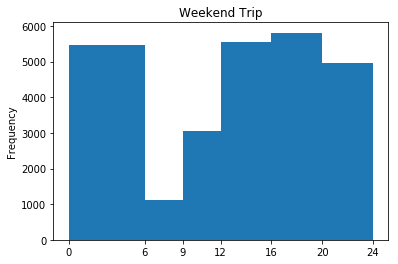

In [19]:
pick_up_weekend = pd.to_datetime(clean_January["pickup_datetime"].loc[clean_January["isWeekend"] == 1], format = '%d/%m/%y %H:%M').dt.hour
pick_up_weekend.plot.hist(bins = [0,6,9,12,16,20,24], xticks = [0,6,9,12,16,20,24])
plt.title("Weekend Trip")
plt.show()

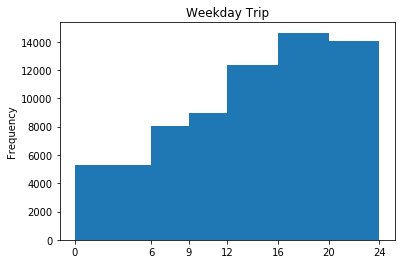

In [20]:
#this plot shows for weekday
pick_up_weekday = pd.to_datetime(clean_January["pickup_datetime"].loc[clean_January["isWeekend"] == 0], format = '%d/%m/%y %H:%M').dt.hour
pick_up_weekday.plot.hist(bins = [0,6,9,12,16,20,24], xticks = [0,6,9,12,16,20,24])
plt.title("Weekday Trip")
plt.show()

# Answer to 3

In [22]:
#in this part we use bar chart to show the mean trpi ratio in each hour from 0 to 23

In [23]:
from numpy import arange

#create the hour series
pickup_hour = pd.to_datetime(clean_January["pickup_datetime"], format = '%d/%m/%y %H:%M').dt.hour
#calculate income efficiency
income_efficiency = clean_January["payment_amount"] / clean_January["duration"]

#insert data into framework
clean_January.insert(7, "income efficiency", income_efficiency)
clean_January.insert(8, "hour", pickup_hour)


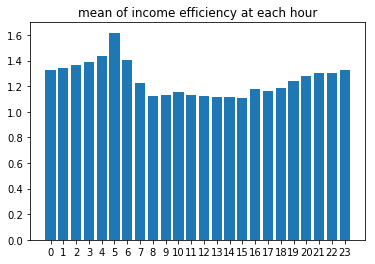

In [24]:
#list that store mean for each hour
mean_list = []
for i in range(24):
    #extract the data at that hour
    hour_list = clean_January.loc[(clean_January['hour'] == i)]
    #read the income efficiency at that hour, find the mean
    mean_by_hour = hour_list["income efficiency"].mean()
    #add mean into list
    mean_list.append(mean_by_hour)

plt.bar(arange(len(mean_list)), mean_list)
plt.xticks([x for x in range(24)])
plt.title("mean of income efficiency at each hour")
plt.show()